In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_column', 50)

In [2]:
train_df=pd.read_excel(r'dataset/House_Rent_Train.xlsx')
train_df

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25.0,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,19,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,SEMI_FURNISHED,BOTH,1650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,20,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,1,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,21,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,1,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,22,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,0,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocessing

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20555 entries, 0 to 20554
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20555 non-null  object 
 1   type             20528 non-null  object 
 2   locality         20395 non-null  object 
 3   activation_date  20532 non-null  object 
 4   latitude         20532 non-null  float64
 5   longitude        20532 non-null  float64
 6   lease_type       20532 non-null  object 
 7   gym              20555 non-null  int64  
 8   lift             20555 non-null  int64  
 9   swimming_pool    20555 non-null  int64  
 10  negotiable       20555 non-null  int64  
 11  furnishing       20555 non-null  object 
 12  parking          20555 non-null  object 
 13  property_size    20555 non-null  int64  
 14  property_age     20532 non-null  float64
 15  bathroom         20532 non-null  float64
 16  facing           20532 non-null  object 
 17  cup_board   

In [4]:
train_df.isna().sum()

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

In [5]:
train_df.nunique()

id                 20523
type                   9
locality            1917
activation_date    19566
latitude           17733
longitude          17726
lease_type             4
gym                    2
lift                   2
swimming_pool          2
negotiable             2
furnishing             3
parking                4
property_size       1141
property_age          44
bathroom               8
facing                 8
cup_board             19
floor                 23
total_floor           27
amenities           4994
water_supply           3
building_type          4
balconies              9
rent                 206
dtype: int64

In [6]:
# Use the duplicated() function to identify duplicates
train_df[train_df.duplicated()]

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
20500,ff808181647075bb01647079241a0118,BHK3,Kasavanahalli,2018-06-07 22:50:00,12.910722,77.677019,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,2500,5.0,3.0,N,4.0,0.0,1.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,1.0,29000.0
20501,ff8081815f0fe396015f13d79a4f5212,BHK1,Basavanagara,13-10-2017 10:52,12.966132,77.681297,FAMILY,0,0,0,0,SEMI_FURNISHED,BOTH,600,3.0,1.0,E,1.0,3.0,3.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORP_BORE,IH,1.0,9000.0
20502,ff80818160b5a24e0160b5da24c216d2,NaN,Whitefield,2018-02-01 14:41:00,12.978994,77.752149,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1535,5.0,2.0,E,3.0,2.0,5.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,AP,2.0,25000.0
20503,ff8081815fdc759c015fdf0192b900eb,NaN,Jayanagar,22-11-2017 15:50,12.938239,77.584256,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1470,3.0,2.0,N,3.0,2.0,3.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,AP,0.0,35000.0
20504,ff808181581e545101581f5c5aeb35da,NaN,Sarjapur Road Wipro To Railway Crossing,2017-12-08 13:40:00,12.905571,77.701797,FAMILY,1,1,0,0,SEMI_FURNISHED,BOTH,1400,2.0,3.0,W,3.0,3.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",CORP_BORE,AP,2.0,18000.0
20505,ff8081816451a4760164544ab2eb4943,BHK1,Bellandur,2018-03-07 14:32:00,12.926303,77.675278,FAMILY,0,1,0,1,SEMI_FURNISHED,TWO_WHEELER,500,1.0,1.0,N,1.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,1.0,15000.0
20506,ff8081814e322687014e343219020f1b,BHK2,Bommanahalli,2018-12-04 12:53:00,12.904039,77.627142,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,700,3.0,2.0,E,2.0,1.0,3.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,1.0,13500.0
20507,ff8081815f62b315015f62bc4d96059d,BHK1,Kaggadasapura,28-10-2017 17:40,12.983759,77.678939,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,600,6.0,1.0,E,2.0,5.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,1.0,10000.0
20508,ff80818159ded60e0159dfff948e5bcb,BHK1,Ulsoor,2017-11-10 17:08:00,12.979762,77.615395,ANYONE,0,1,0,1,SEMI_FURNISHED,TWO_WHEELER,850,30.0,2.0,E,1.0,1.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,1.0,20000.0
20509,ff8081815b587dc7015b5c3c0c3d27b8,NaN,"Someshwara Layout,Doddakannelli",22-01-2018 16:58,12.904160,77.691874,ANYONE,1,1,0,0,SEMI_FURNISHED,BOTH,1400,3.0,3.0,E,3.0,2.0,4.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,23000.0


In [7]:
# Drop duplicates based on a specific subset of columns
train_df.drop_duplicates(subset=['id'], keep='first', inplace = True)

In [8]:
print('Unique values in id column:', train_df.id.nunique())

Unique values in id column: 20523


In [9]:
# Here value of the id column is unique. That's why I droped id column
train_df.drop('id', axis=1, inplace = True)
train_df.head()

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25.0,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


In [10]:
train_df.type.unique()

array(['BHK2', 'BHK3', 'BHK1', 'RK1', 'BHK4', 'BHK4PLUS', '1BHK1', 'bhk2',
       'bhk3', nan], dtype=object)

In [11]:
# Rental Property Type Mapping
train_df['type'] = train_df['type'].str.upper()
train_df['type'] = train_df['type'].str.replace('1BHK1', 'BHK1')
train_df.type.value_counts()

type
BHK2        11686
BHK3         4398
BHK1         3607
RK1           553
BHK4          233
BHK4PLUS       31
Name: count, dtype: int64

In [12]:
train_df.locality.nunique()

1917

In [13]:
# Rental Property Type Mapping
train_df['locality'] = train_df['locality'].str.upper()
train_df.locality.nunique()

1841

In [14]:
train_df.dropna(axis = 0, inplace = True)
train_df.reset_index(drop = True, inplace= True)
train_df.head()

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,BHK2,BELLANDUR,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
1,BHK3,THIRUVANMIYUR,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
2,BHK1,ATTIGUPPE,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
3,BHK3,KODIHALLI,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
4,BHK1,"SEETHARAMPALYA,HOODI",24-10-2017 18:29,12.986196,77.718314,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,0.0,2.0,E,1.0,3.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",CORP_BORE,AP,2.0,18000.0


In [15]:
train_df.activation_date = pd.to_datetime(train_df['activation_date'] ).dt.date
train_df.head()

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,BHK2,BELLANDUR,2017-09-10,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
1,BHK3,THIRUVANMIYUR,2018-12-06,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
2,BHK1,ATTIGUPPE,2018-07-20,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
3,BHK3,KODIHALLI,2018-05-31,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
4,BHK1,"SEETHARAMPALYA,HOODI",2017-10-24,12.986196,77.718314,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,0.0,2.0,E,1.0,3.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",CORP_BORE,AP,2.0,18000.0


In [16]:
train_df.isna().sum()

type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [17]:
#Converting values of the "amenities" column into DataFrame

train_df.amenities.apply(lambda x: json.loads(x))
amenities_df = pd.DataFrame(train_df.amenities.apply(lambda x: json.loads(x)).tolist())
amenities_df.columns = [col.lower() for col in amenities_df.columns]
amenities_df

,lift,gym,internet,ac,club,intercom,pool,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
0,True,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True,False,True,True
1,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True
4,True,True,False,False,True,False,True,True,True,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20352,True,False,True,False,False,False,False,False,True,False,True,True,True,True,False,False,True,False,True
20353,False,False,True,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False
20354,True,True,True,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False
20355,True,False,True,False,False,False,False,True,True,False,True,True,False,True,False,False,True,True,True


In [18]:
for col in amenities_df:
    if col in [i for i in train_df.columns]:
        print(col)

lift
gym


In [19]:
amenities_df.drop(['lift', 'gym', 'pool'], axis=1, inplace = True)
amenities_df.head()

,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
0,False,False,False,False,False,False,False,True,True,False,True,True,True,False,True,True
1,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True
4,False,False,True,False,True,True,False,True,False,False,False,False,False,False,True,False


In [20]:
#converting boolean values into numerical value
for col in amenities_df.columns:
    amenities_df[col] = amenities_df[col].apply(lambda x: 1 if x == True else 0)
amenities_df.head()

,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,1
1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0


In [21]:
# Concatinating train_df and amenities_df

train_df = pd.concat([train_df, amenities_df], axis = 1)
train_df

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
0,BHK2,BELLANDUR,2017-09-10,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,1
1,BHK3,THIRUVANMIYUR,2018-12-06,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1
2,BHK1,ATTIGUPPE,2018-07-20,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,BHK3,KODIHALLI,2018-05-31,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,BHK1,"SEETHARAMPALYA,HOODI",2017-10-24,12.986196,77.718314,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,0.0,2.0,E,1.0,3.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",CORP_BORE,AP,2.0,18000.0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20352,BHK1,ULSOOR,2017-11-10,12.979762,77.615395,ANYONE,0,1,0,1,SEMI_FURNISHED,TWO_WHEELER,850,30.0,2.0,E,1.0,1.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,1.0,20000.0,1,0,0,0,0,1,0,1,1,1,1,0,0,1,0,1
20353,BHK2,KORAMANGALA 4TH BLOCK,2017-10-19,12.931072,77.632361,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000,10.0,2.0,N,2.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,2.0,30000.0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0
20354,BHK2,KUMARASWAMY LAYOUT,2017-12-21,12.901800,77.566597,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0.0,2.0,W,2.0,5.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2.0,16000.0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
20355,BHK2,INDIRANAGAR,2018-06-28,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5.0,2.0,E,2.0,2.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,3.0,30000.0,1,0,0,0,1,1,0,1,1,0,1,0,0,1,1,1


In [22]:
train_df.drop('amenities', axis = 1, inplace = True)
train_df.head()

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
0,BHK2,BELLANDUR,2017-09-10,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,CORPORATION,AP,2.0,22000.0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,1
1,BHK3,THIRUVANMIYUR,2018-12-06,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,CORP_BORE,AP,3.0,28000.0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1
2,BHK1,ATTIGUPPE,2018-07-20,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,CORPORATION,IH,0.0,8000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,BHK3,KODIHALLI,2018-05-31,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,CORPORATION,IH,1.0,45000.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,BHK1,"SEETHARAMPALYA,HOODI",2017-10-24,12.986196,77.718314,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,0.0,2.0,E,1.0,3.0,5.0,CORP_BORE,AP,2.0,18000.0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0


In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20357 entries, 0 to 20356
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             20357 non-null  object 
 1   locality         20357 non-null  object 
 2   activation_date  20357 non-null  object 
 3   latitude         20357 non-null  float64
 4   longitude        20357 non-null  float64
 5   lease_type       20357 non-null  object 
 6   gym              20357 non-null  int64  
 7   lift             20357 non-null  int64  
 8   swimming_pool    20357 non-null  int64  
 9   negotiable       20357 non-null  int64  
 10  furnishing       20357 non-null  object 
 11  parking          20357 non-null  object 
 12  property_size    20357 non-null  int64  
 13  property_age     20357 non-null  float64
 14  bathroom         20357 non-null  float64
 15  facing           20357 non-null  object 
 16  cup_board        20357 non-null  float64
 17  floor       

# Exploratory Data Analysis (EDA)

In [24]:
train_df

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
0,BHK2,BELLANDUR,2017-09-10,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,CORPORATION,AP,2.0,22000.0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,1
1,BHK3,THIRUVANMIYUR,2018-12-06,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,CORP_BORE,AP,3.0,28000.0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1
2,BHK1,ATTIGUPPE,2018-07-20,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,CORPORATION,IH,0.0,8000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,BHK3,KODIHALLI,2018-05-31,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,CORPORATION,IH,1.0,45000.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,BHK1,"SEETHARAMPALYA,HOODI",2017-10-24,12.986196,77.718314,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,0.0,2.0,E,1.0,3.0,5.0,CORP_BORE,AP,2.0,18000.0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20352,BHK1,ULSOOR,2017-11-10,12.979762,77.615395,ANYONE,0,1,0,1,SEMI_FURNISHED,TWO_WHEELER,850,30.0,2.0,E,1.0,1.0,4.0,CORP_BORE,AP,1.0,20000.0,1,0,0,0,0,1,0,1,1,1,1,0,0,1,0,1
20353,BHK2,KORAMANGALA 4TH BLOCK,2017-10-19,12.931072,77.632361,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000,10.0,2.0,N,2.0,1.0,2.0,CORPORATION,IH,2.0,30000.0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0
20354,BHK2,KUMARASWAMY LAYOUT,2017-12-21,12.901800,77.566597,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0.0,2.0,W,2.0,5.0,5.0,BOREWELL,AP,2.0,16000.0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
20355,BHK2,INDIRANAGAR,2018-06-28,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5.0,2.0,E,2.0,2.0,4.0,CORP_BORE,AP,3.0,30000.0,1,0,0,0,1,1,0,1,1,0,1,0,0,1,1,1


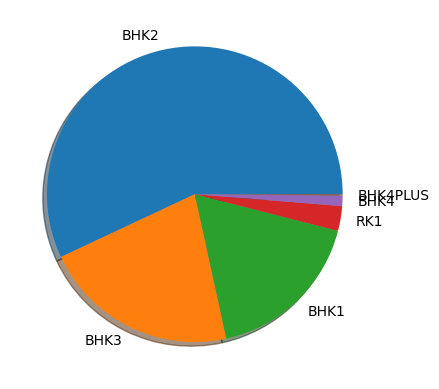

In [25]:
plt.pie(x = train_df.type.value_counts(), shadow = True, labels = train_df.type.unique())
plt.show()

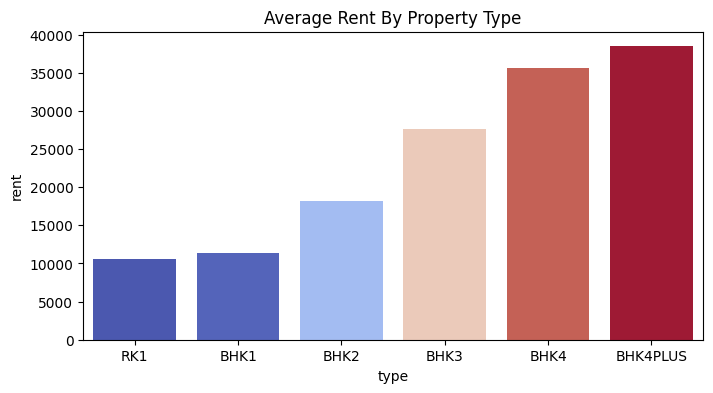

In [26]:
df =train_df.groupby('type')['rent'].mean().sort_values(ascending=True)

plt.figure(figsize = (8,4))
sns.barplot( x = df.index, y=df, hue = df,  palette = "coolwarm", legend = False)
plt.title('Average Rent By Property Type')
plt.show()


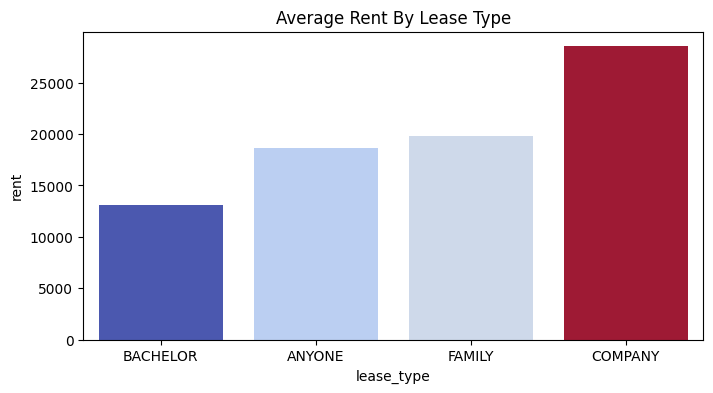

In [27]:
df =train_df.groupby('lease_type')['rent'].mean().sort_values(ascending=True)

plt.figure(figsize = (8,4))
sns.barplot( x = df.index, y=df, hue = df,  palette = "coolwarm", legend = False)
plt.title('Average Rent By Lease Type')
plt.show()

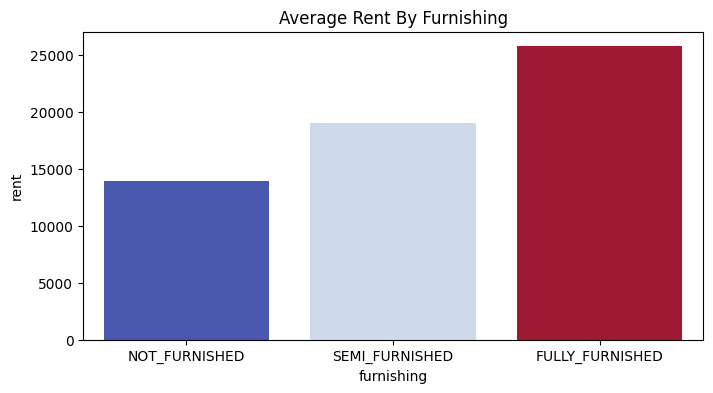

In [28]:
df =train_df.groupby('furnishing')['rent'].mean().sort_values(ascending=True)

plt.figure(figsize = (8,4))
sns.barplot( x = df.index, y=df, hue = df,  palette = "coolwarm", legend = False)
plt.title('Average Rent By Furnishing')
plt.show()

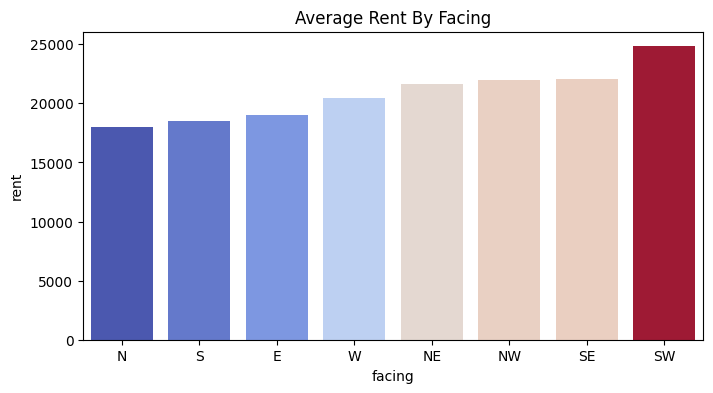

In [29]:
df =train_df.groupby('facing')['rent'].mean().sort_values(ascending=True)

plt.figure(figsize = (8,4))
sns.barplot( x = df.index, y=df, hue = df,  palette = "coolwarm", legend = False)
plt.title('Average Rent By Facing')
plt.show()

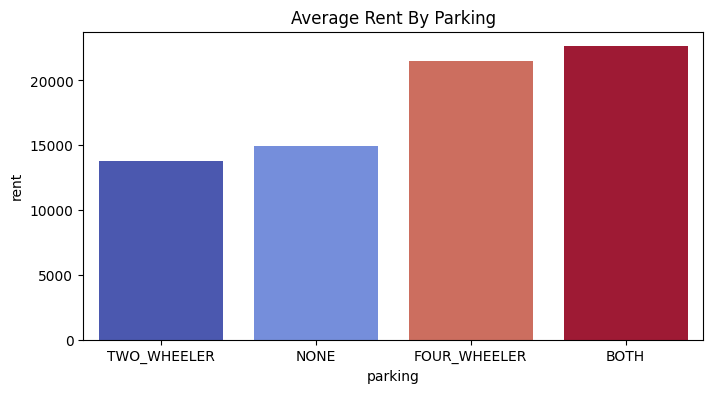

In [30]:
df =train_df.groupby('parking')['rent'].mean().sort_values(ascending=True)

plt.figure(figsize = (8,4))
sns.barplot( x = df.index, y=df, hue = df,  palette = "coolwarm", legend = False)
plt.title('Average Rent By Parking')
plt.show()

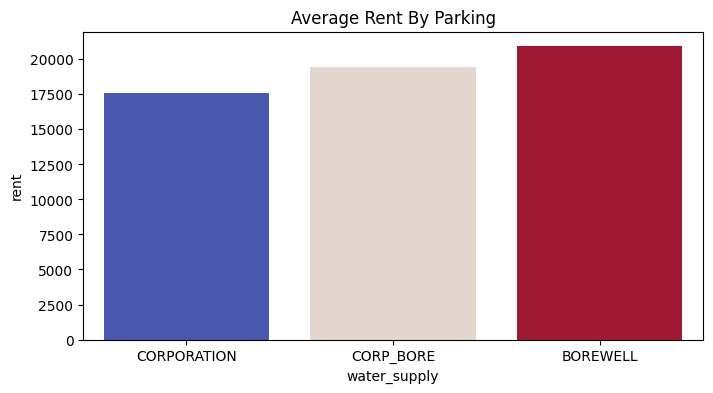

In [31]:
df =train_df.groupby('water_supply')['rent'].mean().sort_values(ascending=True)

plt.figure(figsize = (8,4))
sns.barplot( x = df.index, y=df, hue = df,  palette = "coolwarm", legend = False)
plt.title('Average Rent By Parking')
plt.show()

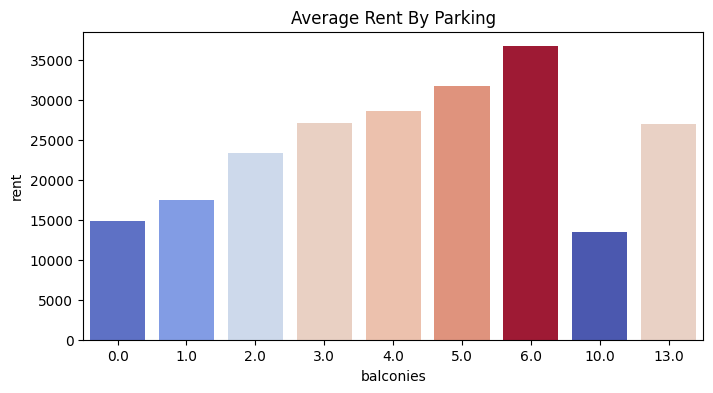

In [32]:
df =train_df.groupby('balconies')['rent'].mean().sort_values(ascending=True)

plt.figure(figsize = (8,4))
sns.barplot( x = df.index, y=df, hue = df,  palette = "coolwarm", legend = False)
plt.title('Average Rent By Parking')
plt.show()

In [63]:
# len(bool_columns)
def amenities_plot(data):
    plt.figure(figsize=(16, 16))

    for ind, column in enumerate(data):
        plot_no = ind + 1
        plt.subplot(5, 4, plot_no)
        sns.barplot(train_df, x = column, y = 'rent', hue = column, legend = False)
        plt.title(f'Average Rent By {column}')

        plt.tight_layout()

    return plt.show()

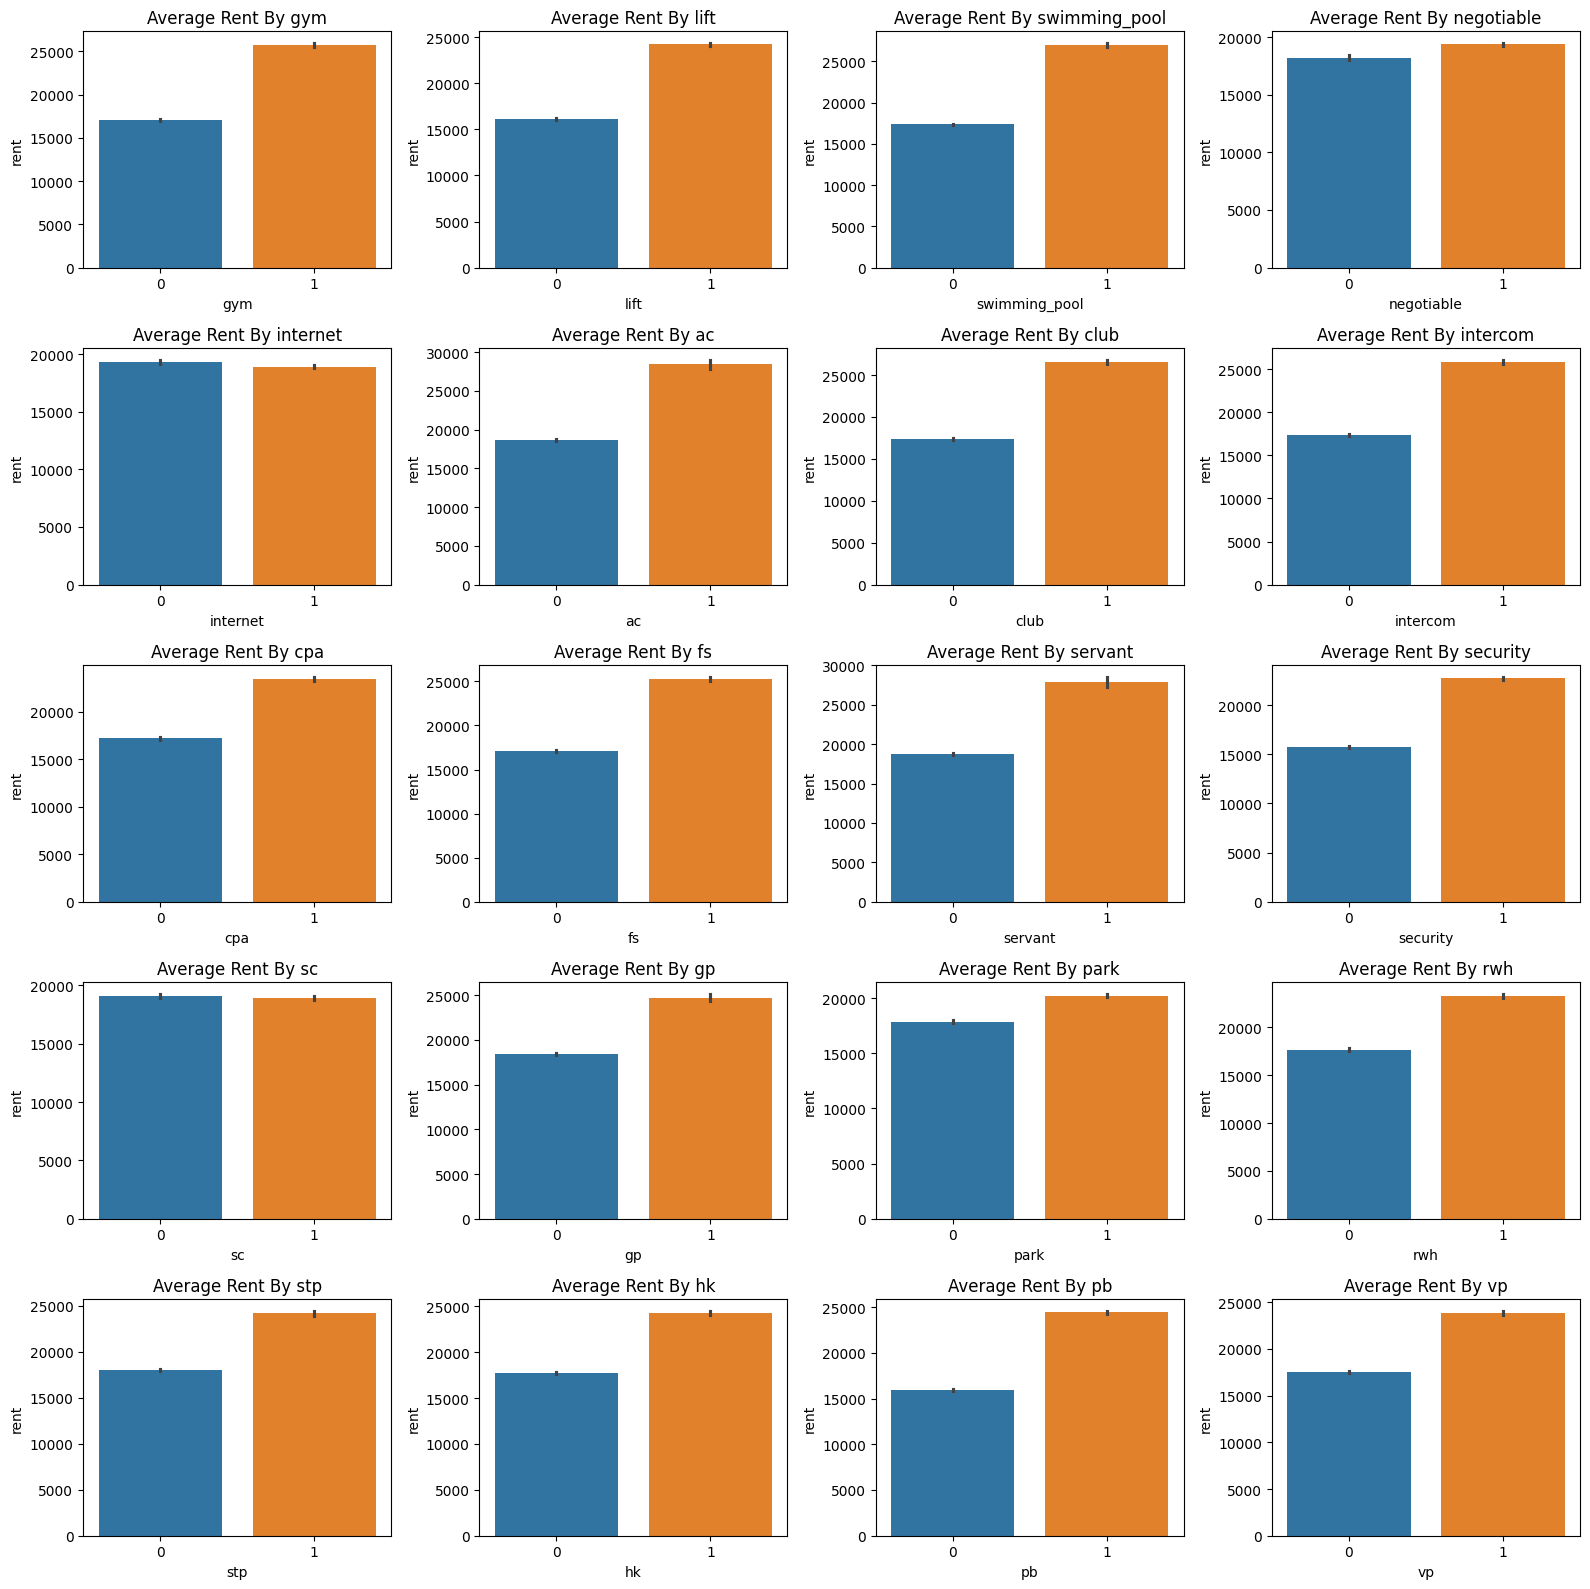

In [64]:
bool_columns = ['gym', 'lift', 'swimming_pool', 'negotiable', 'internet', 'ac', 'club', 'intercom', 'cpa', 'fs', 'servant',
                 'security', 'sc', 'gp', 'park', 'rwh', 'stp', 'hk', 'pb', 'vp']

amenities_plot(bool_columns)